# Gaussian Mixture Model (GMM) - Clustering Probabilístico

Este notebook tiene como objetivo aplicar **GMM** paso a paso con explicación, visualización y evaluación.

**Objetivos:**
- Aplicar GMM a datos sintéticos.
- Visualizar resultados de clustering.
- Evaluar el rendimiento con métricas.
- Concluir sobre ventajas y limitaciones de GMM.

In [1]:
# Paso 1: Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, davies_bouldin_score

## Paso 2: Generar datos sintéticos
Creamos un conjunto de datos con 3 grupos claramente definidos usando `make_blobs()`.

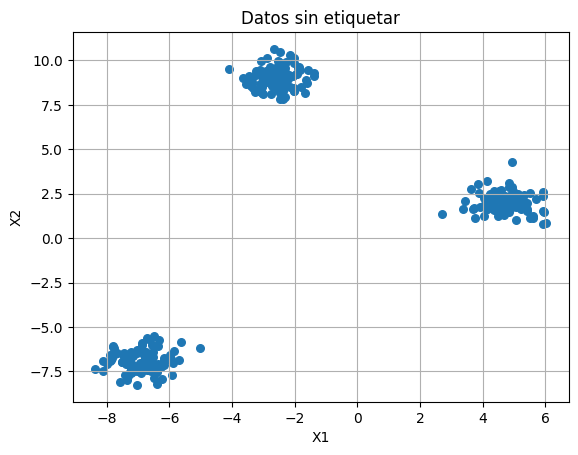

In [2]:
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Visualizar datos sin etiquetar
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Datos sin etiquetar")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

## Paso 3: Aplicar Gaussian Mixture Model
Ajustamos el modelo GMM con 3 componentes, acorde a los grupos generados.

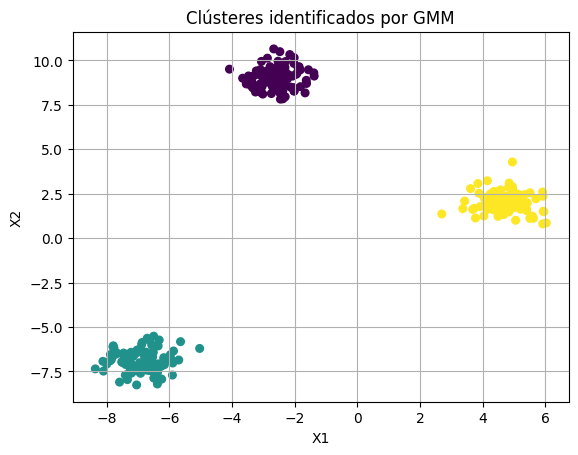

In [3]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

# Visualizar clústeres identificados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.title("Clústeres identificados por GMM")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

## Paso 4: Visualizar probabilidades
Veamos con qué probabilidad GMM asigna los puntos a cada componente.

In [4]:
probs = gmm.predict_proba(X)
print("Probabilidades de pertenencia de los primeros 5 puntos:")
print(probs[:5])

Probabilidades de pertenencia de los primeros 5 puntos:
[[3.13845857e-177 1.00000000e+000 1.56850389e-158]
 [2.74274950e-173 1.00000000e+000 5.90753130e-158]
 [1.00000000e+000 3.51724229e-149 1.26224495e-048]
 [2.34238640e-069 2.17648048e-121 1.00000000e+000]
 [6.95161179e-185 1.00000000e+000 1.26029502e-173]]


## Paso 5: Evaluar rendimiento del clustering
Usamos dos métricas comunes: **Silhouette Score** (más alto es mejor) y **Davies-Bouldin Score** (más bajo es mejor).

In [5]:
sil_score = silhouette_score(X, labels)
db_score = davies_bouldin_score(X, labels)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")

Silhouette Score: 0.9084
Davies-Bouldin Score: 0.1281


## Paso 6: Conclusiones

- El **Silhouette Score** alto indica que los clústeres están bien separados y definidos.
- El **Davies-Bouldin Score** bajo refuerza que los grupos son compactos y distintos.
- GMM **permite formas elípticas** y modelado probabilístico de pertenencia, superando a K-Means en flexibilidad.
- **Limitación:** se requiere especificar el número de componentes, y puede ser sensible a inicialización y outliers.

**Resultado:** GMM es una opción sólida para clustering cuando los datos no siguen formas esféricas claras.